# Introducción al numpy con aplicación  a las señales de audio

## Slicing
En este  ejercicio  veremos:
* Cómo acceder a partes de una matriz mediante *slicing* de numpy

La mecánica que seguiremos será visualizar con ejemplos pequeños la operación a realizar, para luego aplicarsela a la señal de audio.

In [3]:
#Importaremos los módulos necesarios
%matplotlib inline
import sys
sys.path.append('.')
import numpy as np
import upv_audio
import matplotlib
import matplotlib.pyplot as plt
# En este cuaderno veremos la opción inline, para ir variando
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

In [2]:
fs1,x1=upv_audio.read('audios/numeros.wav')
fs2,x2=upv_audio.read('audios/Xiaomi.wav')

Como uno de los ficheros es mono y el otro stereo, habremos te tener cierta precaución a la hora de llamar a las funciones de numpy.

## Seleccionar un fragmento conocido el rango de muestras
De la señal de los números seleccionaremos la segunda palabra.

Primero haremos un plot para saber el rango de muestras. 

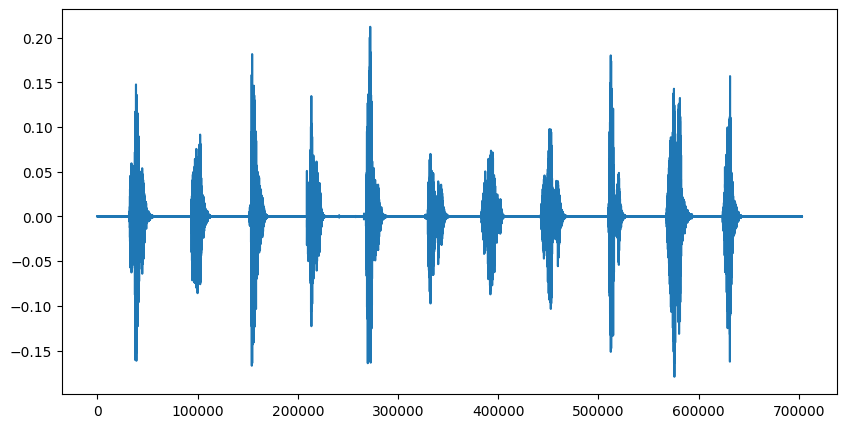

In [24]:
_=plt.plot(x1)


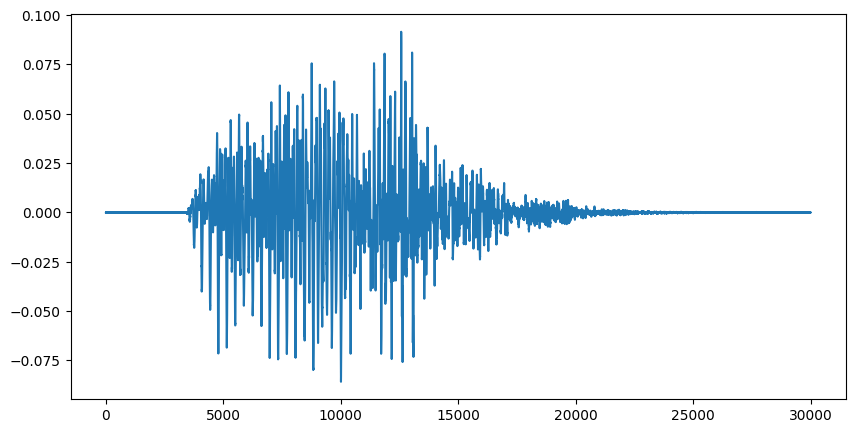

In [28]:
# Seleccionar la segunda palabra
n1=None
n2=None
segundapalabra=None
### BEGIN SOLUTION
n1=90000
n2=120000
segundapalabra=x1[n1:n2]
### END SOLUTION

if segundapalabra is not None:
    _=plt.plot(segundapalabra)




In [29]:
# Comprobación
assert n1 is not None and n2 is not None and segundapalabra is not None
assert n1>55000 and n1 < 95000, "n1 no es correcto"

### BEGIN HIDDEN TESTS
assert n1 is not None and n2 is not None and segundapalabra is not None
assert n1>55000 and n1 < 95000, "n1 no es correcto"
assert n2>110000 and n2 < 150000, "n2 no es correcto"
assert type(segundapalabra)==type(np.zeros(3))
### END HIDDEN TESTS

## Coger la primera mitad de una señal

Recordemos que la duración de una señal en muestras es el valor de shape[0]

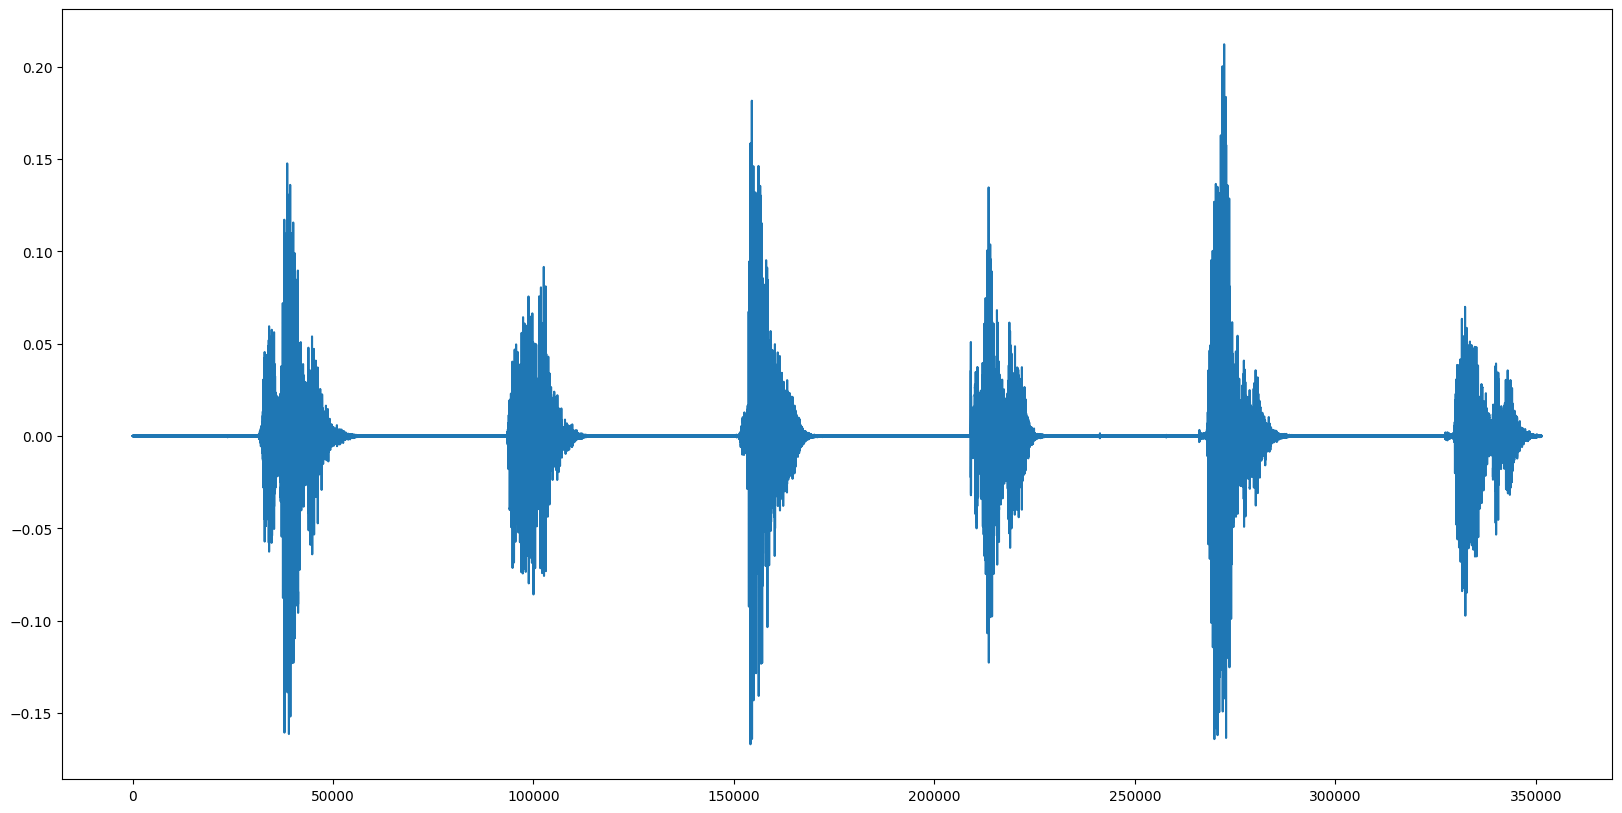

In [21]:
#Senyal Mono Quedarse con la primera mitad

### BEGIN SOLUTION
dur1_mues = x1.shape[0] 
duracion_mitad=int(dur1_mues//2)
primera_mitad=x1[:duracion_mitad]
_=plt.plot(primera_mitad) # Lo de poner _= es simplemente para evitar que salga un mensaje "feo"
### END SOLUTION


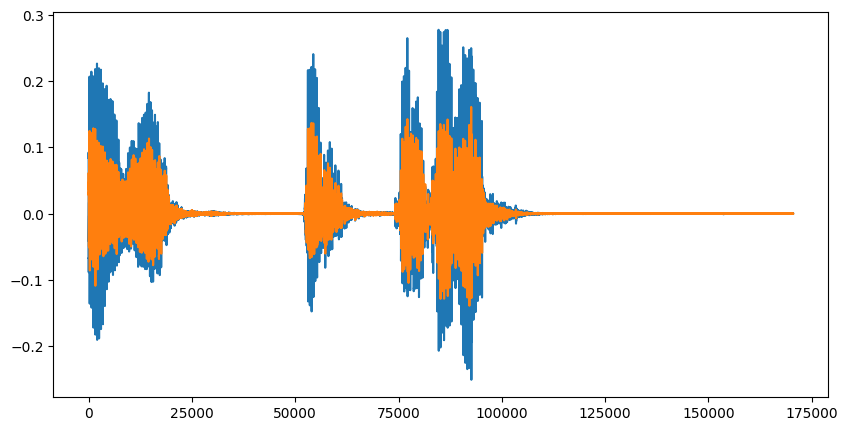

In [30]:
#Senyal Stereo. Obtener la segunda mitad
segunda_mitad = None

### BEGIN SOLUTION
dur2_mues = x2.shape[0] 
mitad_dur2=dur2_mues//2 #División entera
segunda_mitad=x2[mitad_dur2:]
### END SOLUTION
_=plt.plot(segunda_mitad)


In [36]:
assert segunda_mitad.shape==(x2.shape[0]-x2.shape[0]//2,x2.shape[1]), "No tiene la duración adecuada"
### BEGIN HIDDEN TESTS
assert segunda_mitad is not None, "Segunda mitad stereo es None"
s_dur2_mues = x2.shape[0] 
s_mitad_dur2=s_dur2_mues//2 #División entera
s_segunda_mitad=x2[s_mitad_dur2:]
assert s_segunda_mitad.shape == segunda_mitad.shape, "No tiene el tamaño adecuado"
assert np.all(segunda_mitad == s_segunda_mitad)
### END HIDDEN TESTS



### Programar una función que devuelva las dos mitades de una señal
Programar una función que devuelva las dos mitades de una señal sea esta mono o estéreo.

La función recibe como entrada :
* Una señal mono o stereo

Devuelve:

* Una tupla de dos elementos que sean la primera mitad y la segunda

**NOTA:** Si la señal tiene un númer impar de muestras, por ejemplo 11 muestras, la primera mitad tendrá 5 muestras y la segunda 6

In [38]:
def mitades(x):
    ''' Devuelve las dos mitades de una senyal
    Debe funcionar tanto con mono como con stereo'''
    primera_mitad=None
    segunda_mitad=None
    
    ### BEGIN SOLUTION
    d=x.shape[0]
    d2= d//2
    if x.ndim ==1:
        primera_mitad =x[:d2]
        segunda_mitad =x[d2:]
    else:
        primera_mitad =x[:d2,:]
        segunda_mitad =x[d2:,:]
    ### END SOLUTION
    
    return primera_mitad,segunda_mitad

In [ ]:
# Comprobaciones en clase




In [ ]:
### BEGIN HIDDEN TESTS
np.random.seed(2)
xmono=np.random.rand(500)
xstereo_impar=np.random.rand(501,2)
xstereo_par=np.random.rand(150,2)

### AUTOTEST mitades(xmono)
### AUTOTEST mitades(xstereo_impar)
### AUTOTEST mitades(xstereo_par)
### END HIDDEN TESTS

## Quedarse con un canal de la señal stereo
El canal izquierdo es el de índice 0, y el derecho el de índice 1

In [7]:
canalL=None 
### BEGIN SOLUTION
canalL=x2[:,0]
### END SOLUTION
print(canalL.shape)

(340992,)


El resultado solo tiene una dimensión.

**NOTA**
Al seleccionar una columna (o una fila), se reduce el número de dimensiones en 1

**NO es lo mismo** un ndarray de 1 dimensión que un ndarray de 2 dimensiones en los que 1 de las dimensiones tenga un elemento.

En el caso siguiente, se selecciona la columna con una tupla de un elemento. Obsérvese la diferencia en el tamaño del resultado

In [8]:
canalL=None 
### BEGIN SOLUTION
canalL=x2[:,(0,)]
### END SOLUTION
print(canalL.shape)

(340992, 1)


## Seleccionar fragmentos con índices negativos
Usando índices negativos Veremos cómo:
* Quitar las últimas mil muestras de una señal
* Quedarse con las mil últimas muestras de una señal

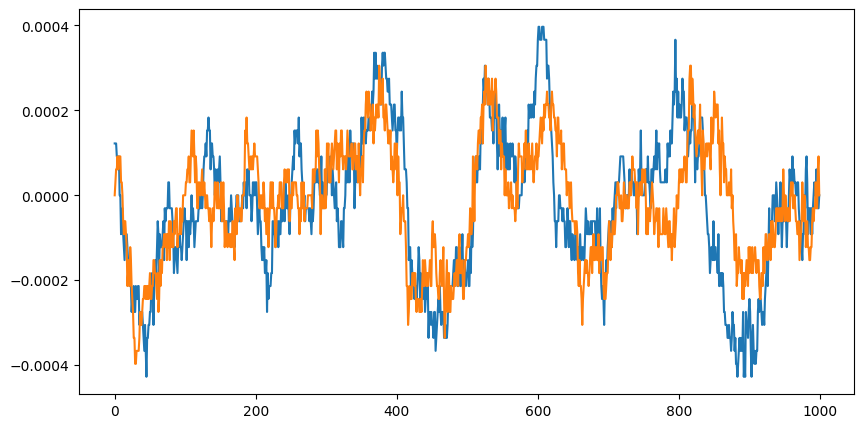

In [42]:
# Coger las mil últimas muestras de una señal stereo

# Obtener las 1000 últimas muestras de la señal x2
ultimas1000=None
### BEGIN SOLUTION
ultimas1000=x2[-1000:,:]# Ambos canales
### END SOLUTION

_=plt.plot(ultimas1000) #

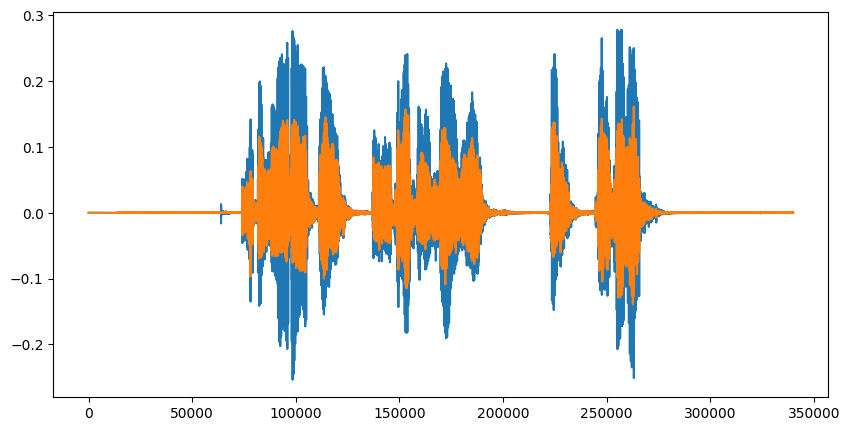

In [43]:
# Tomar todas las muestras menos las 10000 últimas de x2 (stereo)

todas_menos_ultimas_10000=None
### BEGIN SOLUTION
todas_menos_ultimas_10000=x2[:-1000,:]# Ambos canales
### END SOLUTION

_=plt.plot(todas_menos_ultimas_10000)

In [44]:
# Comprobación
### BEGIN HIDDEN TESTS
r_todas_menos_ultimas_10000=x2[:-1000,:]# Ambos canales
r_ultimas1000=x2[-1000:,:]# Ambos canales

assert ultimas1000.shape == r_ultimas1000.shape, "Las dimensiones de las 1000 ultimas no son correctas"
assert r_todas_menos_ultimas_10000.shape == todas_menos_ultimas_10000.shape, "Las dimensiones de todas menos las 10000 últimas no son correctas"

assert np.all(r_ultimas1000 == r_ultimas1000), "Las 1000 últimas no son correctas."
assert np.all(r_todas_menos_ultimas_10000 == todas_menos_ultimas_10000), "Todas menos las 10000 últimas no son correctas"
### END HIDDEN TESTS

## Seleccionar muestras alternas
En este apartado veremos:
* Cómo quedarse con una muestra de cada 3 (diezmado)
* Cómo insertar 2 ceros entre cada muestra original

In [47]:
#Generaremos unas pocas muestras para ver el efecto.
t=np.arange(13)+1

# Tomar una de cada 3 empezando por la primera
d_diez3=None

def diezma(x,factor):
    '''
    x: Vector unidimensional
    factor: tomar 1 de cada factor empezando por la primera
    '''
    ### BEGIN SOLUTION
    y=x[::factor]
    ### END SOLUTION
    return y
    

d_diez3 = diezma(t,3)
print(t,'\n',d_diez3)
# ***** Verificar que hace lo que se supone que debe hacer****

[ 1  2  3  4  5  6  7  8  9 10 11 12 13] 
 [ 1  4  7 10 13]


In [ ]:
### BEGIN HIDDEN TESTS
np.random.seed(2)
kk=np.random.rand(101)
mm=np.random.rand(100)
nn=np.random.rand(102)
### AUTOTEST diezma(kk,2)
### AUTOTEST diezma(kk,3)
### AUTOTEST diezma(kk,4)
### AUTOTEST diezma(mm,2)
### AUTOTEST diezma(nn,3)
### AUTOTEST diezma(mm,4)
### END HIDDEN TESTS

In [56]:
def inserta_ceros(x,factor):
    '''
    x: Señal de audio. Puede ser mono y stereo
    factor: insertar (factor -1) ceros tras cada muestra    
    El resultado esperado debe ser algo así
    x: [ 1  4  7 10 13] 
    salida: [ 1.  0.  0.  4.  0.  0.  7.  0.  0. 10.  0.  0. 13.  0.  0.]
    '''
    
    ### BEGIN SOLUTION
    nmues=x.shape[0]
    if x.ndim==1:
        y=np.zeros(nmues*factor)
        y[::factor]=x
    else:
        y=np.zeros((nmues*factor,x.shape[1]))
        y[::factor,:]=x
    ### END SOLUTION
    return y
    

# Para insertar ceros, primero crearemos un vector de tamaño triple.
# Luego pondremos las muestras en su sitio
x=np.random.randint(low=2,high=10,size=5)
xs=np.random.randint(low=2,high=10,size=(3,2))
i3=inserta_ceros(x,3)
i2=inserta_ceros(x,2)
print(" ******* Pruebas Mono ********")
print('x:',x)
print('i2:',i2)
print('i3:',i3)
print(" ******* Pruebas Stereo ********")
i3s=inserta_ceros(xs,3)
i2s=inserta_ceros(xs,2)      
print('xs:',xs)
print('i2s:',i2s)
print('i3s:',i3s)      

# Verificar el correcto funcionamiento

 ******* Pruebas Mono ********
x: [7 9 5 8 2]
i2: [7. 0. 9. 0. 5. 0. 8. 0. 2. 0.]
i3: [7. 0. 0. 9. 0. 0. 5. 0. 0. 8. 0. 0. 2. 0. 0.]
 ******* Pruebas Stereo ********
xs: [[4 6]
 [6 5]
 [7 2]]
i2s: [[4. 6.]
 [0. 0.]
 [6. 5.]
 [0. 0.]
 [7. 2.]
 [0. 0.]]
i3s: [[4. 6.]
 [0. 0.]
 [0. 0.]
 [6. 5.]
 [0. 0.]
 [0. 0.]
 [7. 2.]
 [0. 0.]
 [0. 0.]]


In [57]:
# Verificación
### BEGIN HIDDEN TESTS
np.random.seed(2)
kk=np.random.rand(101)

### AUTOTEST inserta_ceros(kk,2)
### AUTOTEST inserta_ceros(kk,4)

kks=np.random.rand(300,2)
### AUTOTEST inserta_ceros(kks,3)
### AUTOTEST inserta_ceros(kks,7)

### END HIDDEN TESTS

## Inversión del orden temporal
En este apartado se muestra cómo hacer una señal de audio irreconocible de modo que solo una persona con programas "no-standar" (es decir numpy y ciertos conocimientos) pueda escuchar el mensaje.

Se van a implementar la inversión temporal, consistente en cambiar el orden de las muestras. Es como leer *al revés*.



In [61]:
# Crear una función que invierta el orden temporal de una señal mono o stereo
def inversion_temporal(x):
    '''
    Dada una señal invierte el orden de las muestras.
    Por ejemplo si x =[ 1,7,3] ---> y=[3,7,1]
    '''
    y=None
    ### BEGIN SOLUTION
    if x.ndim==1:
        y=x[::-1]
    else:
        y=x[::-1,:]
    
    ### END SOLUTION
    return y
## Probar para ver que funciona bien
x=np.random.randint(low=2,high=20,size=8) # mono
xs=np.random.randint(low=2,high=20,size=(6,2)) #stereo
ix=inversion_temporal(x)
ixs=inversion_temporal(xs)
print(" ******* Pruebas Mono ********")
print('x:',x)
print('ix:',ix)
print(" ******* Pruebas Stereo ********")
print('xs:',xs)
print('ixs:',ixs)
# Verificar el resultado de los prints para comprobar el correcto funcionamiento

 ******* Pruebas Mono ********
x: [16  5  2 10 19 13  8 11]
ix: [11  8 13 19 10  2  5 16]
 ******* Pruebas Stereo ********
xs: [[15  3]
 [15 15]
 [ 9 17]
 [16  8]
 [15  6]
 [ 7 13]]
ixs: [[ 7 13]
 [15  6]
 [16  8]
 [ 9 17]
 [15 15]
 [15  3]]


In [15]:
# Verificación Mono
### BEGIN HIDDEN TESTS
np.random.seed(2)
kk=np.random.rand(101)
### AUTOTEST inversion_temporal(kk)
### END HIDDEN TESTS

In [ ]:
# Verificación Stereo
### BEGIN HIDDEN TESTS
kks=np.random.rand(300,2)
### AUTOTEST inversion_temporal(kks)

### END HIDDEN TESTS

### Prueba con una señal de audio
En este último apartado invertirá una señal de audio para escuchar el resultado de una inversión temporal

In [64]:
x1_invt=None
fs1,x1=upv_audio.read('audios/numeros.wav')
x1_invt = inversion_temporal(x1)
upv_audio.write('inversion_temporal.wav',fs1,x1_invt)


Proceda a escuchar el fichero *inversion_temporal.wav*

In [65]:
# Comprobación
import os

### BEGIN HIDDEN TESTS
assert os.path.exists('inversion_temporal.wav'), "No se ha creado 'inversion_temporal.wav'"
### AUTOTEST inversion_temporal(kk)
### END HIDDEN TESTS